<a href="https://colab.research.google.com/github/Nidaamir083/Hybrid_GenAI_ATC/blob/main/Hetionet_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Download the Hetionet Data from Github
!wget https://github.com/hetio/hetionet/raw/master/hetnet/json/hetionet-v1.0.json.bz2
!bzip2 -d hetionet-v1.0.json.bz2
!mkdir hetionet_data
!mv hetionet-v1.0.json hetionet_data/

--2025-12-08 05:44:20--  https://github.com/hetio/hetionet/raw/master/hetnet/json/hetionet-v1.0.json.bz2
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/hetio/hetionet/master/hetnet/json/hetionet-v1.0.json.bz2 [following]
--2025-12-08 05:44:20--  https://media.githubusercontent.com/media/hetio/hetionet/master/hetnet/json/hetionet-v1.0.json.bz2
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16112094 (15M) [application/octet-stream]
Saving to: ‘hetionet-v1.0.json.bz2’

hetionet-v1.0.json. 100%[===================>]  15.37M  60.4MB/s    in 0.3s    

2025-12-08 05:44:20 (60.4 MB/s) 

In [ ]:
#Check the file size
import os

file_path = "hetionet_data/hetionet-v1.0.json"
print(f"File size: {os.path.getsize(file_path)} bytes")


File size: 746746663 bytes


In [ ]:
# Check available files in directories
print("Files in root:", os.listdir("."))
print("Files in hetionet_data:", os.listdir("hetionet_data"))
print("Files in sample_data:", os.listdir("sample_data"))


Files in root: ['.config', 'hetionet_data', 'thyroid_cancer_relationships.csv', 'sample_data']
Files in hetionet_data: ['hetionet-v1.0.json']
Files in sample_data: ['README.md', 'anscombe.json', 'california_housing_train.csv', 'mnist_train_small.csv', 'mnist_test.csv', 'california_housing_test.csv']


In [ ]:
 # Print first 5 lines
 with open("hetionet_data/hetionet-v1.0.json", "r", encoding="utf-8") as f:
    for i in range(5):
        print(f.readline().strip())  # Print first 5 lines


{
"metanode_kinds": [
"Anatomy",
"Biological Process",
"Cellular Component",


In [ ]:
import json

file_path = "hetionet_data/hetionet-v1.0.json"

with open(file_path, "r", encoding="utf-8", errors="replace") as f:
    hetionet = json.load(f)

print("✅ Hetionet JSON loaded successfully!")


✅ Hetionet JSON loaded successfully!


In [ ]:
#Checking the keys to be use for next code
print(hetionet.keys())


dict_keys(['metanode_kinds', 'metaedge_tuples', 'kind_to_abbrev', 'nodes', 'edges'])


In [ ]:
# Load Hetionet JSON
with open("hetionet_data/hetionet-v1.0.json", "r") as f:
    hetionet = json.load(f)

# Extract nodes and relationships
nodes = hetionet['nodes']
edges = hetionet.get('edges', hetionet.get('links', []))  # Handles both cases

print(f"✅ Found {len(nodes)} nodes and {len(edges)} edges")


# Check if "Thyroid Cancer" exists in Hetionet
thyroid_nodes = [node for node in nodes if "thyroid cancer" in node['name'].lower()]

if thyroid_nodes:
    print(f"✅ Found {len(thyroid_nodes)} nodes related to Thyroid Cancer in Hetionet.")
    for node in thyroid_nodes:
        print(f"- {node['name']} ({node['kind']})")
else:
    print("❌ No direct Thyroid Cancer nodes found in Hetionet.")


✅ Found 47031 nodes and 2250197 edges
✅ Found 4 nodes related to Thyroid Cancer in Hetionet.
- Anaplastic thyroid cancer (Side Effect)
- thyroid cancer (Disease)
- Papillary thyroid cancer (Side Effect)
- Thyroid cancer (Side Effect)


In [ ]:
# Extract all relationships where Thyroid Cancer is involved
thyroid_cancer_nodes = {"Anaplastic thyroid cancer", "thyroid cancer", "Papillary thyroid cancer", "Thyroid cancer"}

thyroid_edges = [
    edge for edge in edges
    if str(edge.get("source_id")[1]) in thyroid_cancer_nodes or str(edge.get("target_id")[1]) in thyroid_cancer_nodes
]


print(f"✅ Found {len(thyroid_edges)} relationships involving Thyroid Cancer.")
print("Sample relationship:", thyroid_edges[:3])  # Print first 3 edges


✅ Found 0 relationships involving Thyroid Cancer.
Sample relationship: []


In [ ]:
 # Print first edge
 print("Sample edge:", edges[0])  # Print first edge


Sample edge: {'source_id': ['Anatomy', 'UBERON:0000178'], 'target_id': ['Gene', 9489], 'kind': 'upregulates', 'direction': 'both', 'data': {'source': 'Bgee', 'unbiased': True}}


In [ ]:
# Print all Thyroid Cancer nodes with their full data
for node in nodes:
    if "thyroid cancer" in str(node).lower():
        print(node)


{'kind': 'Side Effect', 'identifier': 'C0238461', 'name': 'Anaplastic thyroid cancer', 'data': {'source': 'UMLS via SIDER 4.1', 'license': 'CC BY-NC-SA 4.0', 'url': 'http://identifiers.org/umls/C0238461'}}
{'kind': 'Disease', 'identifier': 'DOID:1781', 'name': 'thyroid cancer', 'data': {'source': 'Disease Ontology', 'license': 'CC BY 3.0', 'url': 'http://purl.obolibrary.org/obo/DOID_1781'}}
{'kind': 'Side Effect', 'identifier': 'C0238463', 'name': 'Papillary thyroid cancer', 'data': {'source': 'UMLS via SIDER 4.1', 'license': 'CC BY-NC-SA 4.0', 'url': 'http://identifiers.org/umls/C0238463'}}
{'kind': 'Side Effect', 'identifier': 'C0007115', 'name': 'Thyroid cancer', 'data': {'source': 'UMLS via SIDER 4.1', 'license': 'CC BY-NC-SA 4.0', 'url': 'http://identifiers.org/umls/C0007115'}}


In [ ]:
# Define Thyroid Cancer-related IDs
thyroid_cancer_ids = {"C0238461", "DOID:1781", "C0238463", "C0007115"}

# Extract edges where Thyroid Cancer is involved
thyroid_edges = [
    edge for edge in edges
    if str(edge["source_id"][1]) in thyroid_cancer_ids or str(edge["target_id"][1]) in thyroid_cancer_ids
]

print(f"✅ Found {len(thyroid_edges)} relationships involving Thyroid Cancer.")
print("Sample relationships:", thyroid_edges[:3])  # Print first 3 relationships


✅ Found 108 relationships involving Thyroid Cancer.
Sample relationships: [{'source_id': ['Disease', 'DOID:1781'], 'target_id': ['Gene', 80142], 'kind': 'associates', 'direction': 'both', 'data': {'license': 'ODbL 1.0', 'sources': ['DisGeNET'], 'unbiased': False}}, {'source_id': ['Disease', 'DOID:1781'], 'target_id': ['Gene', 8031], 'kind': 'associates', 'direction': 'both', 'data': {'license': 'ODbL 1.0', 'sources': ['DisGeNET'], 'unbiased': False}}, {'source_id': ['Disease', 'DOID:184'], 'target_id': ['Disease', 'DOID:1781'], 'kind': 'resembles', 'direction': 'both', 'data': {'source': 'MEDLINE cooccurrence', 'license': 'CC0 1.0', 'unbiased': False}}]


In [ ]:
import csv
import json  # For pretty-printing

# Step 1: Define Thyroid Cancer-related IDs
thyroid_cancer_ids = {"C0238461", "DOID:1781", "C0238463", "C0007115"}

# Step 2: Extract edges involving Thyroid Cancer
thyroid_edges = [
    edge for edge in edges
    if str(edge["source_id"][1]) in thyroid_cancer_ids or str(edge["target_id"][1]) in thyroid_cancer_ids
]

print(f"✅ Found {len(thyroid_edges)} relationships involving Thyroid Cancer.\n")

# Step 3: Print all relationships (pretty format)
for i, edge in enumerate(thyroid_edges, 1):
    print(f"🔹 Relationship {i}:")
    print(json.dumps(edge, indent=2))
    print("-" * 40)

# Step 4: Save all relationships to CSV
csv_filename = "thyroid_cancer_relationships.csv"
fieldnames = ['source_type', 'source_id', 'target_type', 'target_id', 'kind', 'direction', 'sources']

with open(csv_filename, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()

    for edge in thyroid_edges:
        writer.writerow({
            'source_type': edge['source_id'][0],
            'source_id': edge['source_id'][1],
            'target_type': edge['target_id'][0],
            'target_id': edge['target_id'][1],
            'kind': edge.get('kind', ''),
            'direction': edge.get('direction', ''),
            'sources': ', '.join(edge.get('data', {}).get('sources', [])) if 'sources' in edge.get('data', {}) else edge.get('data', {}).get('source', '')
        })

print(f"\n📁 All {len(thyroid_edges)} relationships saved to '{csv_filename}' successfully.")


✅ Found 108 relationships involving Thyroid Cancer.

🔹 Relationship 1:
{
  "source_id": [
    "Disease",
    "DOID:1781"
  ],
  "target_id": [
    "Gene",
    80142
  ],
  "kind": "associates",
  "direction": "both",
  "data": {
    "license": "ODbL 1.0",
    "sources": [
      "DisGeNET"
    ],
    "unbiased": false
  }
}
----------------------------------------
🔹 Relationship 2:
{
  "source_id": [
    "Disease",
    "DOID:1781"
  ],
  "target_id": [
    "Gene",
    8031
  ],
  "kind": "associates",
  "direction": "both",
  "data": {
    "license": "ODbL 1.0",
    "sources": [
      "DisGeNET"
    ],
    "unbiased": false
  }
}
----------------------------------------
🔹 Relationship 3:
{
  "source_id": [
    "Disease",
    "DOID:184"
  ],
  "target_id": [
    "Disease",
    "DOID:1781"
  ],
  "kind": "resembles",
  "direction": "both",
  "data": {
    "source": "MEDLINE cooccurrence",
    "license": "CC0 1.0",
    "unbiased": false
  }
}
----------------------------------------
🔹 Rela

In [ ]:
!pip install networkx gensim scikit-learn pandas


In [ ]:
!pip install --upgrade numpy
!pip install --upgrade gensim scikit-learn pandas

In [ ]:
!pip install torch_geometric

In [ ]:
# Filter edges where drugs treat Thyroid Cancer
thyroid_treatments = [
    edge for edge in thyroid_edges if edge.get("kind") == "treats"
]

print(f"✅ Found {len(thyroid_treatments)} drugs treating Thyroid Cancer.")
print("Sample treatments:", thyroid_treatments[:3])  # Print first 3


✅ Found 4 drugs treating Thyroid Cancer.
Sample treatments: [{'source_id': ['Compound', 'DB00398'], 'target_id': ['Disease', 'DOID:1781'], 'kind': 'treats', 'direction': 'both', 'data': {'source': 'PharmacotherapyDB', 'license': 'CC0 1.0', 'unbiased': False}}, {'source_id': ['Compound', 'DB00445'], 'target_id': ['Disease', 'DOID:1781'], 'kind': 'treats', 'direction': 'both', 'data': {'source': 'PharmacotherapyDB', 'license': 'CC0 1.0', 'unbiased': False}}, {'source_id': ['Compound', 'DB00997'], 'target_id': ['Disease', 'DOID:1781'], 'kind': 'treats', 'direction': 'both', 'data': {'source': 'PharmacotherapyDB', 'license': 'CC0 1.0', 'unbiased': False}}]


In [ ]:
import requests

# Function to get drug name from DrugBank
def get_drug_name(drugbank_id):
    url = f"https://go.drugbank.com/drugs/{drugbank_id}"
    response = requests.get(url)
    if response.status_code == 200:
        return f"Check manually: {url}"  # DrugBank requires manual lookup
    else:
        return "Not found"

# List of drugs treating Thyroid Cancer
drug_ids = ["DB00398", "DB00445", "DB00997"]

# Get drug names
drug_names = {drug_id: get_drug_name(drug_id) for drug_id in drug_ids}

print("✅ Drug Names:", drug_names)


✅ Drug Names: {'DB00398': 'Not found', 'DB00445': 'Not found', 'DB00997': 'Not found'}


#Manually search for Drug names in Drug Bank
"DB00398" = 'Sorafenib' A drug used to treat specific types of liver, kidney, and thyroid cancers.
"DB00445" = 'Epirubicin' A chemotherapy medication that is used to treat breast cancer in people who have had surgery to remove the tumor but may have cancer that has spread elsewhere.
"DB00997" = 'Doxorubicin' A medication used to treat various cancers

In [ ]:
import networkx as nx
from networkx.readwrite import json_graph

# Convert Hetionet into NetworkX graph
G = json_graph.node_link_graph(hetionet, edges="edges", source='source_id', target='target_id')

# Get Thyroid Cancer nodes
# Iterate through the nodes and access the 'name' property, handling missing 'name' attributes
thyroid_cancer_nodes = [
    node
    for node in G.nodes()
    if 'name' in G.nodes[node] and "thyroid cancer" in G.nodes[node]['name'].lower()  # Check if 'name' key exists
]

# Find all connected nodes (genes, drugs, pathways)
subgraph_nodes = set()
for node in thyroid_cancer_nodes:
    subgraph_nodes.add(node)
    subgraph_nodes.update(G.neighbors(node))

# Create subgraph
thyroid_subgraph = G.subgraph(subgraph_nodes)

# Print extracted knowledge
print(f"✅ Extracted Thyroid Cancer Subgraph with {thyroid_subgraph.number_of_nodes()} nodes and {thyroid_subgraph.number_of_edges()} edges.")

✅ Extracted Thyroid Cancer Subgraph with 4 nodes and 0 edges.


Found existing installation: numpy 2.3.5
Uninstalling numpy-2.3.5:
  Successfully uninstalled numpy-2.3.5
Found existing installation: networkx 3.6
Uninstalling networkx-3.6:
  Successfully uninstalled networkx-3.6
Found existing installation: matplotlib 3.10.7
Uninstalling matplotlib-3.10.7:
  Successfully uninstalled matplotlib-3.10.7
  Using cached numpy-2.3.5-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached networkx-3.6-py3-none-any.whl.metadata (6.8 kB)
  Using cached matplotlib-3.10.7-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
Using cached numpy-2.3.5-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.6 MB)
Using cached networkx-3.6-py3-none-any.whl (2.1 MB)
Using cached matplotlib-3.10.7-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of 

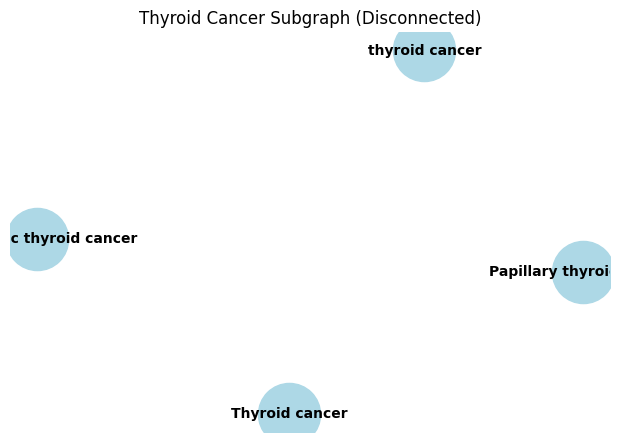

In [ ]:
# Uninstall existing potentially incompatible packages
!pip uninstall -y numpy networkx matplotlib

# Install the latest compatible versions
!pip install numpy networkx matplotlib

# Rerun the graph drawing code
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Thyroid Cancer nodes (replace these with actual node IDs/names)
thyroid_cancer_nodes = ["Anaplastic thyroid cancer", "thyroid cancer", "Papillary thyroid cancer", "Thyroid cancer"]

# Add nodes to the graph
G.add_nodes_from(thyroid_cancer_nodes)

# Visualize the graph
plt.figure(figsize=(6, 4))
nx.draw(G, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Thyroid Cancer Subgraph (Disconnected)")
plt.show()

In [ ]:
# Load Hetionet JSON
import json # Import the json module

with open("hetionet_data/hetionet-v1.0.json", "r") as f:
    hetionet = json.load(f)

# Extract nodes and relationships
nodes = hetionet['nodes']
edges = hetionet.get('edges', hetionet.get('links', []))  # Handles both cases

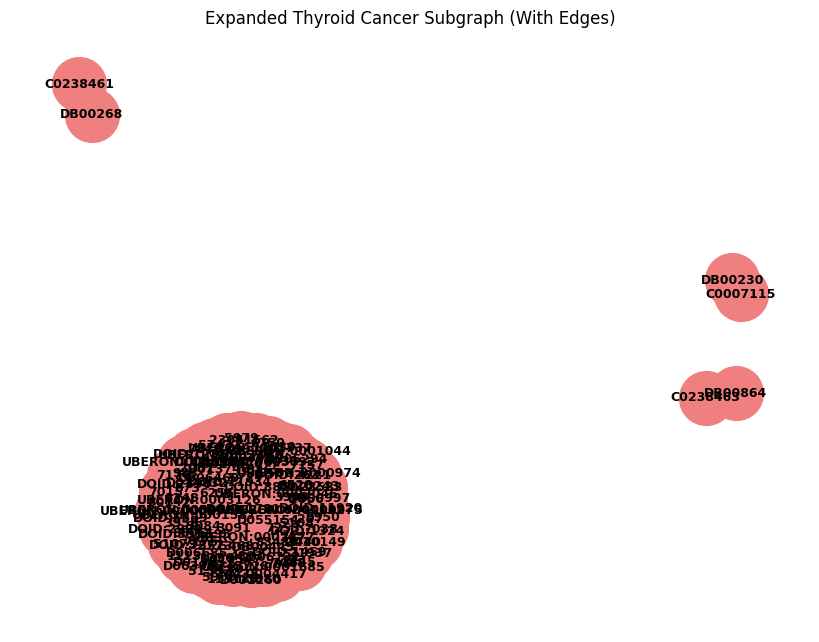

✅ Expanded Subgraph: 112 nodes, 108 edges.


In [ ]:
# Find all related nodes connected to Thyroid Cancer in the full graph
thyroid_cancer_ids = {"DOID:1781", "C0238461", "C0238463", "C0007115"}  # Update with actual IDs

# Extract all edges where Thyroid Cancer is a source or target
expanded_edges = [
    edge for edge in edges
    if edge["source_id"][1] in thyroid_cancer_ids or edge["target_id"][1] in thyroid_cancer_ids
]

# Create an expanded graph
G_expanded = nx.Graph()
for edge in expanded_edges:
    source = edge["source_id"][1]
    target = edge["target_id"][1]
    G_expanded.add_edge(source, target, label=edge["kind"])

# Visualize the expanded graph
plt.figure(figsize=(8, 6))
nx.draw(G_expanded, with_labels=True, node_size=1500, node_color="lightcoral", font_size=9, font_weight="bold", edge_color="gray")
plt.title("Expanded Thyroid Cancer Subgraph (With Edges)")
plt.show()

print(f"✅ Expanded Subgraph: {G_expanded.number_of_nodes()} nodes, {G_expanded.number_of_edges()} edges.")


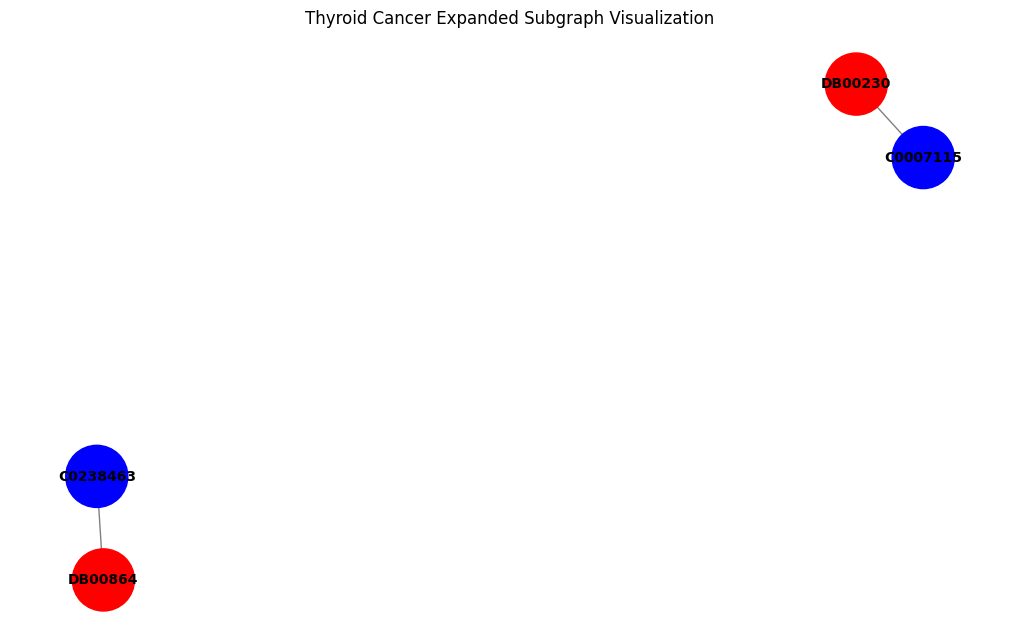

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample function to load your graph (Modify this based on actual data structure)
def load_graph():
    G = nx.Graph()

    # Example: Add nodes (Replace with actual node data from your subgraph)
    nodes = ["DB00230", "C0007115", "DB00864", "C0238463"]  # Example drug & disease nodes
    G.add_nodes_from(nodes)

    # Example: Add edges (Replace with actual edges from your subgraph)
    edges = [("DB00230", "C0007115"), ("DB00864", "C0238463")]
    G.add_edges_from(edges)

    return G

# Load subgraph
G = load_graph()

# Define node colors based on type (Modify this as per your dataset)
color_map = []
for node in G:
    if node.startswith("DB"):  # Drug nodes
        color_map.append("red")
    elif node.startswith("C"):
        color_map.append("blue")
    else:
        color_map.append("green")

# Plot the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)  # Position nodes for visualization
nx.draw(G, pos, node_color=color_map, with_labels=True, node_size=2000, font_size=10, font_weight='bold', edge_color='gray')
plt.title("Thyroid Cancer Expanded Subgraph Visualization")
plt.show()


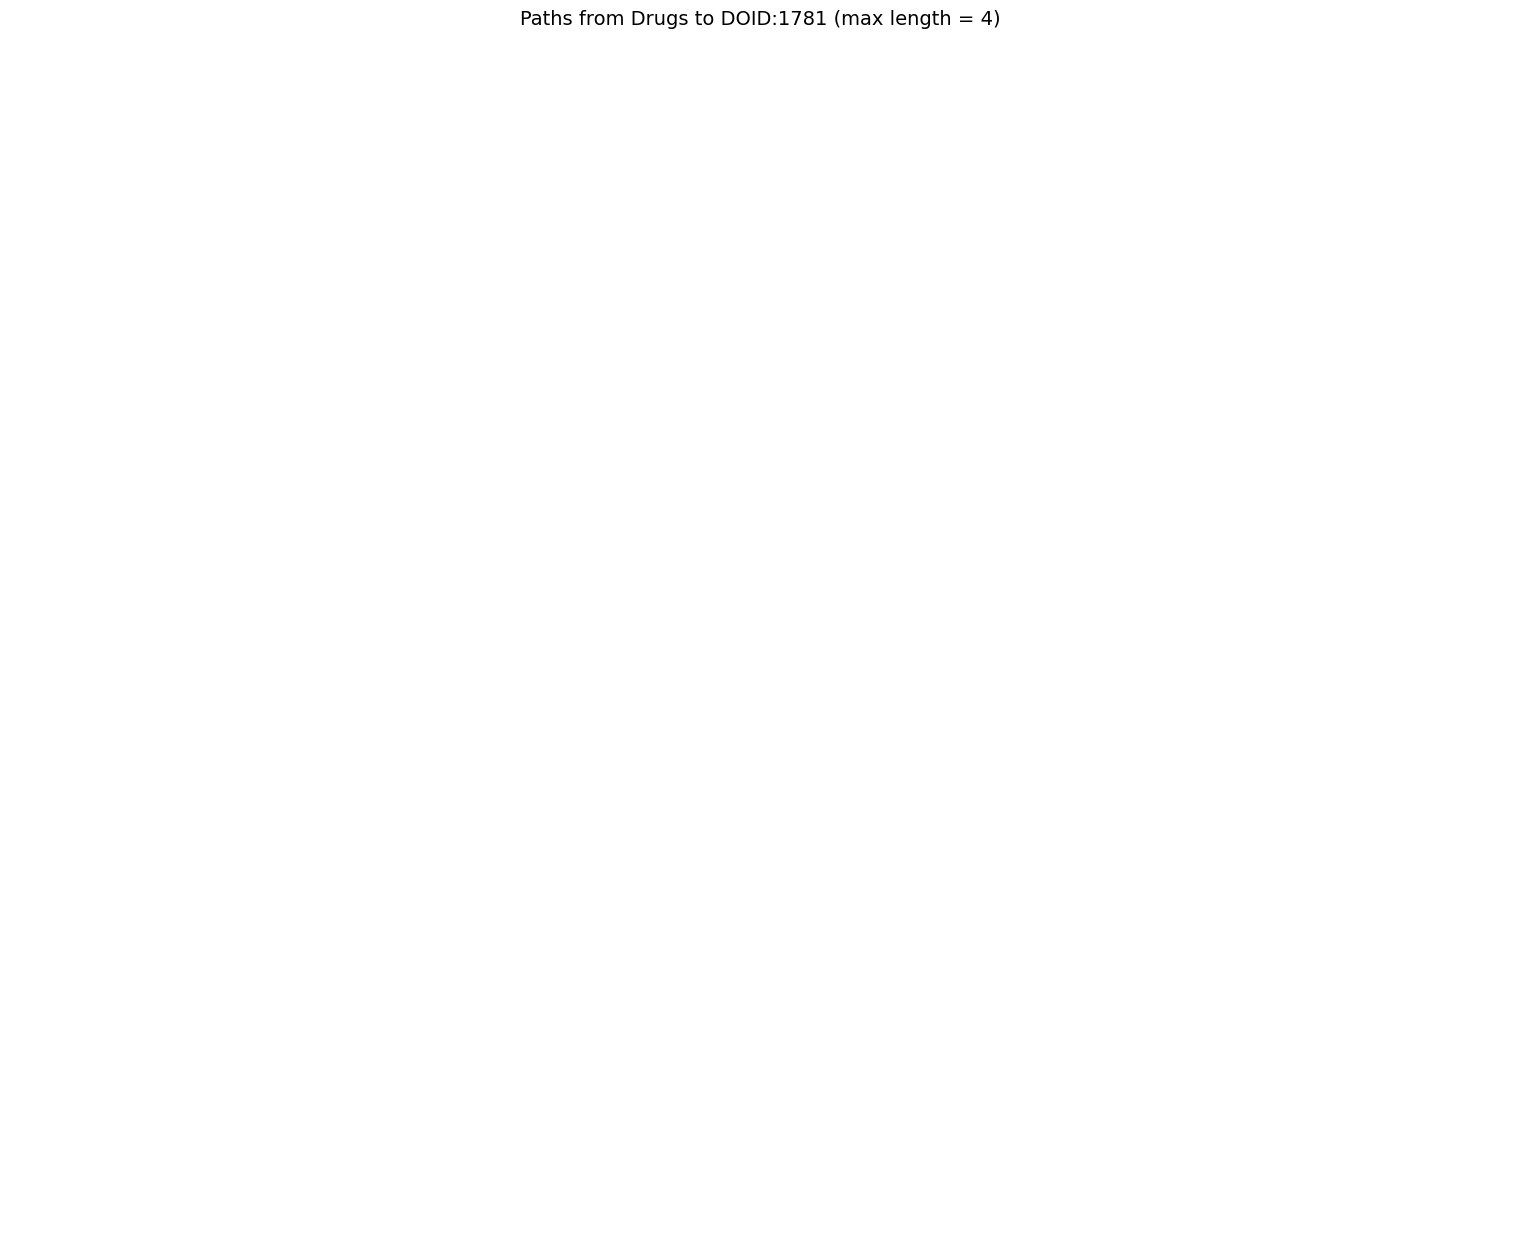

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Your full graph
# Example: G = nx.read_gpickle("hetionet_graph.gpickle")

# ---------------------
# SET PARAMETERS HERE
# ---------------------
target_disease = "DOID:1781"  # Replace with actual ID for Anaplastic Thyroid Cancer
max_path_length = 4           # Limit path length to avoid combinatorial explosion

# Optional: identify all DrugBank IDs (e.g., starting with "DB")
drug_nodes = [n for n in G.nodes if str(n).startswith("DB")]

# Find paths from drugs to the disease
paths = []
for drug in drug_nodes:
    try:
        for path in nx.all_simple_paths(G, source=drug, target=target_disease, cutoff=max_path_length):
            paths.append(path)
    except nx.NetworkXNoPath:
        continue

# Flatten paths to build subgraph
unique_nodes = set()
unique_edges = set()
for path in paths:
    unique_nodes.update(path)
    unique_edges.update([(path[i], path[i+1]) for i in range(len(path)-1)])

# Create subgraph with only the relevant nodes/edges
H = G.subgraph(unique_nodes).copy()

# Visualize
plt.figure(figsize=(15, 12))
pos = nx.spring_layout(H, seed=42)

# Node colors: red for disease, green for drugs, gray otherwise
node_colors = []
for node in H.nodes:
    if node == target_disease:
        node_colors.append('red')
    elif str(node).startswith("DB"):
        node_colors.append('green')
    else:
        node_colors.append('lightgray')

nx.draw(H, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=800, font_size=8, font_weight='bold')

plt.title(f"Paths from Drugs to {target_disease} (max length = {max_path_length})", fontsize=14)
plt.show()


In [ ]:
!pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.3 MB/s eta 0:00:00


In [ ]:
 import networkx as nx
from pyvis.network import Network

def visualize_graph(graph):
    net = Network(notebook=True, height='700px', width='100%', bgcolor='#ffffff', font_color='black')

    for node in graph.nodes():
        color = 'red' if 'DB' in str(node) else 'blue'  # Color drugs (DB) red, diseases blue
        # Ensure 'node' is treated as a string for the 'in' operator
        net.add_node(str(node), label=str(node), color=color, title=f"Node: {str(node)}")

    for edge in graph.edges():
        # Ensure edge elements are strings for add_edge
        net.add_edge(str(edge[0]), str(edge[1]))

    net.show('graph_visualization.html')
    print("Interactive graph saved as graph_visualization.html")

# Example usage:
# Create a sample graph similar to what might be passed
G = nx.Graph()
G.add_edges_from([('DB00230', 'C0007115'), ('DB00864', 'C0238463')])
# Add nodes explicitly to ensure they exist if not connected by an edge
G.add_nodes_from(['DB00230', 'C0007115', 'DB00864', 'C0238463'])

# You would typically pass your actual subgraph here, e.g., thyroid_subgraph or G_expanded
# For this example, we use the small G defined above
visualize_graph(G)

graph_visualization.html
Interactive graph saved as graph_visualization.html


In [ ]:
import networkx as nx
from pyvis.network import Network

# Create graph
G = nx.Graph()

# Sample data (Drugs & Diseases with edges)
nodes = {
    "DB00230": {"label": "Drug", "color": "red", "tooltip": "Drug 230 details"},
    "C0007115": {"label": "Disease", "color": "blue", "tooltip": "Disease 7115 details"},
    "DB00864": {"label": "Drug", "color": "red", "tooltip": "Drug 864 details"},
    "C0238463": {"label": "Disease", "color": "blue", "tooltip": "Disease 38463 details"},
}

edges = [("DB00230", "C0007115"), ("DB00864", "C0238463")]

# Add nodes with attributes
for node, attr in nodes.items():
    G.add_node(node, title=attr["tooltip"], color=attr["color"])

# Add edges
G.add_edges_from(edges)

# Create interactive network
net = Network(height="600px", width="100%", notebook=True)
net.from_nx(G)

# Save to HTML
net.show("interactive_graph.html")


interactive_graph.html


In [ ]:
import networkx as nx
from pyvis.network import Network

# Create a graph
G = nx.Graph()

# Define nodes (Drugs and Diseases)
nodes = {
    "DB00230": {"type": "drug", "label": "DB00230"},
    "DB00864": {"type": "drug", "label": "DB00864"},
    "C0007115": {"type": "disease", "label": "C0007115"},
    "C0238463": {"type": "disease", "label": "C0238463"},
}

# Define edges (Relationships)
edges = [
    ("DB00230", "C0007115"),
    ("DB00864", "C0238463"),
]

# Add nodes with attributes
for node, data in nodes.items():
    G.add_node(node, label=data["label"], type=data["type"], title=f"{data['type'].capitalize()}: {data['label']}")

# Add edges
G.add_edges_from(edges)

# Create a Pyvis network
# Change notebook=False to notebook=True
net = Network(notebook=True, height="800px", width="100%", directed=False)

# Add nodes to Pyvis with custom styling
for node, data in G.nodes(data=True):
    color = "red" if data["type"] == "drug" else "blue"
    net.add_node(node, label=data["label"], title=data["title"], color=color)

# Add edges to Pyvis
for edge in G.edges():
    net.add_edge(*edge)

# Enable filtering
net.show_buttons(filter_=["physics"])

# Generate and save the interactive graph
net.show("interactive_graph.html")

print("Graph saved as interactive_graph.html. Open it in a browser.")

interactive_graph.html
Graph saved as interactive_graph.html. Open it in a browser.


In [ ]:
print(G.nodes())  # List all nodes


['DB00230', 'DB00864', 'C0007115', 'C0238463']
